In [1]:
import collections
import datetime
import json
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
def mean(values):
    return sum(values) / len(values)

def median(values):
    return sorted(values)[len(values) // 2]

def variance(values):
    mean_ = mean(values)
    sum_of_squares = sum([(value - mean_) ** 2 for value in values])
    return (sum_of_squares / len(values)) ** 0.5

def was_merged(pull_request):
    return pull_request["merged_at"] is not None

In [3]:
TIME_FORMAT = "%Y-%m-%dT%H:%M:%SZ"

def parse_date(date_str):
    return datetime.datetime.strptime(date_str, TIME_FORMAT)

def open_duration(pull_request):
    """ Duration between open & closed in days
    """
    created = parse_date(pull_request["created_at"])
    merged = parse_date(pull_request["merged_at"])
    return (merged - created).total_seconds() / (60 * 60 * 24)

def nice_time(seconds):
    whole_seconds = math.floor(seconds)
    return str(datetime.timedelta(seconds=whole_seconds))

In [5]:
with open('data/pull-requests.json') as pull_requests_file:
    pull_requests = json.load(pull_requests_file)

In [6]:
open_durations = np.array([
    open_duration(pull_request)
    for pull_request in pull_requests
    if was_merged(pull_request)
])
created_dates = [
    parse_date(pull_request["merged_at"])
    for pull_request in pull_requests
    if was_merged(pull_request)
]

In [12]:
open_duration_dict = [
    { "duration": duration, "merged_at": created_at }
    for duration, created_at in zip(open_durations, created_dates)
]
df = pd.DataFrame(open_duration_dict)
df.merged_at = pd.to_datetime(df.merged_at)
df.set_index('merged_at', inplace=True)

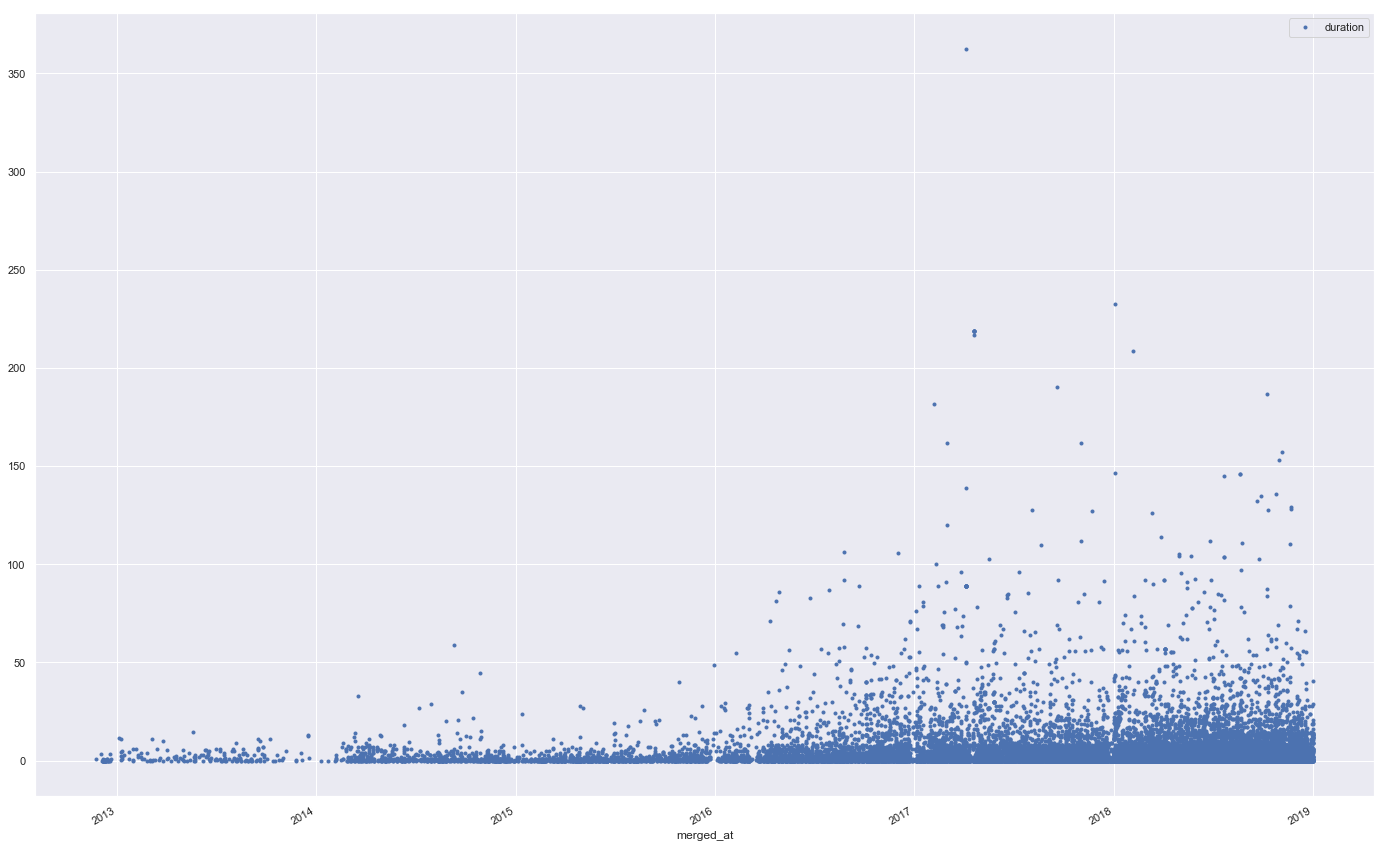

In [13]:
df.plot(style='.', logy=False, figsize=(24, 16))

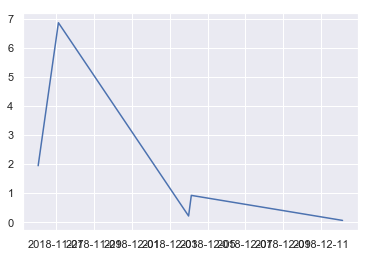

In [8]:
prs = [
    (open_duration(pr), parse_date(pr['created_at']))
    for pr in pull_requests
    if pr['user']['login'] == 'kavehsajjadi' and pr['merged_at'] != None
]
durations, created_dates = zip(*prs)
plt.plot(created_dates, durations)

In [16]:
max(filter(was_merged, pull_requests), key=open_duration)

{'_id': '5c2c768e6b0694c652628281',
 'url': 'https://api.github.com/repos/Canva/canva/pulls/5616',
 'id': 65733369,
 'node_id': 'MDExOlB1bGxSZXF1ZXN0NjU3MzMzNjk=',
 'html_url': 'https://github.com/Canva/canva/pull/5616',
 'diff_url': 'https://github.com/Canva/canva/pull/5616.diff',
 'patch_url': 'https://github.com/Canva/canva/pull/5616.patch',
 'issue_url': 'https://api.github.com/repos/Canva/canva/issues/5616',
 'number': 5616,
 'state': 'closed',
 'locked': False,
 'title': "Add migration to support Fusion consolidating their schools' Canva accounts",
 'user': {'login': 'icosahebron',
  'id': 403516,
  'node_id': 'MDQ6VXNlcjQwMzUxNg==',
  'avatar_url': 'https://avatars0.githubusercontent.com/u/403516?v=4',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/icosahebron',
  'html_url': 'https://github.com/icosahebron',
  'followers_url': 'https://api.github.com/users/icosahebron/followers',
  'following_url': 'https://api.github.com/users/icosahebron/following{/other_user}',
